In [1000]:
import os
os.chdir("C:/Users/kalyanbablu/Desktop/Data Sets")

In [1001]:
os.getcwd()

'C:\\Users\\kalyanbablu\\Desktop\\Data Sets'

In [1002]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('6forestfires.csv')

In [1003]:
data.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [ ]:
data['Logarea']=np.log10(data['area']+1)
data

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
labelencoder=LabelEncoder() 
data['month']=labelencoder.fit_transform(data['month'])
data['day']=labelencoder.fit_transform(data['day'])
data

In [ ]:
data.boxplot(column='Logarea',by='DMC')

In [ ]:
data.columns

In [1034]:
features=data.iloc[::].values
features

array([[ 7.        ,  5.        ,  7.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  4.        , 10.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  4.        , 10.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 7.        ,  4.        ,  1.        , ...,  0.        ,
        11.16      ,  1.08493357],
       [ 1.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  3.        ,  9.        , ...,  0.        ,
         0.        ,  0.        ]])

In [1035]:
labels=data.iloc[:,-1].values
labels


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [1036]:
df=pd.DataFrame(features)


In [1037]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Logarea'],
      dtype='object')

In [1038]:
df.columns=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Logarea']

In [1039]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Logarea
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.482512
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.607333
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.181844
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.879096
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,3.038159


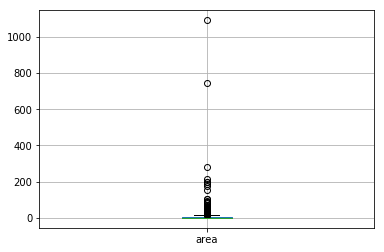

In [1040]:
data.boxplot(column='area')

In [1041]:
q1=data['area'].quantile(0.25)
q3=data['area'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['area']>low) & (data['area'] < high)]

In [1042]:
q1=data['X'].quantile(0.25)
q3=data['X'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['X']>low) & (data['X'] < high)]

In [1043]:
q1=data['Y'].quantile(0.25)
q3=data['Y'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['Y']>low) & (data['Y'] < high)]

In [1044]:
q1=data['month'].quantile(0.25)
q3=data['month'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['month']>low) & (data['month'] < high)]

In [1045]:
q1=data['day'].quantile(0.25)
q3=data['day'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['day']>low) & (data['day'] < high)]

In [1046]:
q1=data['FFMC'].quantile(0.25)
q3=data['FFMC'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['FFMC']>low) & (data['FFMC'] < high)]

In [1047]:
q1=data['DMC'].quantile(0.25)
q3=data['DMC'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['DMC']>low) & (data['DMC'] < high)]

In [1048]:
q1=data['DMC'].quantile(0.25)
q3=data['DMC'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['DMC']>low) & (data['DMC'] < high)]

In [1049]:
q1=data['month'].quantile(0.25)
q3=data['month'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['month']>low) & (data['month'] < high)]

In [1050]:
q1=data['ISI'].quantile(0.25)
q3=data['ISI'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['ISI']>low) & (data['ISI'] < high)]

In [1051]:
q1=data['temp'].quantile(0.25)
q3=data['temp'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['temp']>low) & (data['temp'] < high)]

In [1052]:
q1=data['month'].quantile(0.25)
q3=data['month'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['month']>low) & (data['month'] < high)]

In [1053]:
q1=data['RH'].quantile(0.25)
q3=data['RH'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['RH']>low) & (data['RH'] < high)]

In [1054]:
q1=data['wind'].quantile(0.25)
q3=data['wind'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['wind']>low) & (data['wind'] < high)]

In [1055]:
q1=data['rain'].quantile(0.25)
q3=data['rain'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['rain']>low) & (data['rain'] < high)]

In [1056]:
q1=data['Logarea'].quantile(0.25)
q3=data['Logarea'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['Logarea']>low) & (data['Logarea'] < high)]

In [1057]:
q1=data['DC'].quantile(0.25)
q3=data['DC'].quantile(0.75)
iqr=q3-q1 
low=q1-1.5*iqr
high=q3+1.5*iqr
d=data.loc[(data['DC']>low) & (data['DC'] < high)]

In [1058]:
d

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Logarea
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
5,8,6,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0.000000
6,8,6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,0.000000
7,8,6,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,0.000000
8,8,6,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,0.000000
9,7,5,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,0.000000


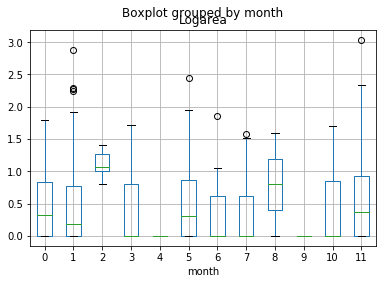

In [1067]:
d.boxplot(column='Logarea',by='month')

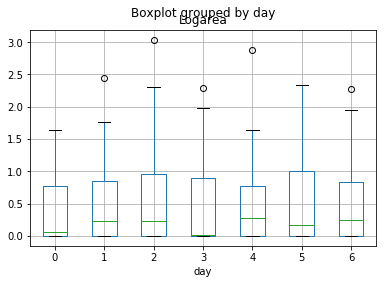

In [1060]:
d.boxplot(column='Logarea',by='day')

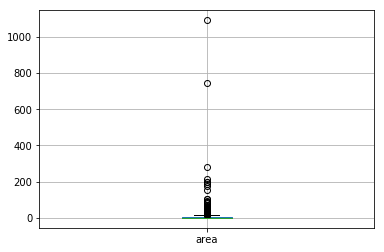

In [1061]:
d.boxplot(column='area')

In [1062]:
d.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Logarea
X,1.000000,0.537859,-0.016118,-0.011644,-0.027162,-0.054624,-0.096079,0.001309,-0.059217,0.082898,0.013898,0.065525,0.063186,0.061386
Y,0.537859,1.000000,-0.063805,0.027941,-0.056168,0.001416,-0.114103,-0.030992,-0.034686,0.063544,-0.025817,0.033098,0.044807,0.041820
month,-0.016118,-0.063805,1.000000,-0.149713,-0.023465,-0.193186,0.208498,-0.187134,-0.094887,-0.091150,-0.145003,-0.077767,0.030129,0.041162
day,-0.011644,0.027941,-0.149713,1.000000,0.086485,0.077688,0.068554,0.127273,0.162871,-0.113424,-0.032801,0.053539,0.020522,0.032533
FFMC,-0.027162,-0.056168,-0.023465,0.086485,1.000000,0.350804,0.283117,0.512616,0.405676,-0.288942,-0.021097,0.056712,0.037028,0.046327
DMC,-0.054624,0.001416,-0.193186,0.077688,0.350804,1.000000,0.664556,0.279641,0.445340,0.102535,-0.105635,0.074520,0.071328,0.069254
DC,-0.096079,-0.114103,0.208498,0.068554,0.283117,0.664556,1.000000,0.192855,0.465873,-0.007920,-0.209487,0.034670,0.046934,0.069608
ISI,0.001309,-0.030992,-0.187134,0.127273,0.512616,0.279641,0.192855,1.000000,0.372981,-0.116347,0.110630,0.067155,0.005184,-0.012480
temp,-0.059217,-0.034686,-0.094887,0.162871,0.405676,0.445340,0.465873,0.372981,1.000000,-0.517581,-0.233269,0.069553,0.097729,0.060959
RH,0.082898,0.063544,-0.091150,-0.113424,-0.288942,0.102535,-0.007920,-0.116347,-0.517581,1.000000,0.073463,0.102840,-0.074809,-0.055098


In [1063]:
d.cov()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Logarea
X,5.380931,1.539854,-0.164152,-0.051989,-0.335899,-7.998098,-53.652670,0.013728,-0.778983,3.100599,0.057483,0.045336,9.401157,0.086738
Y,1.539854,1.523228,-0.345737,0.066376,-0.369569,0.110305,-33.901143,-0.172984,-0.242769,1.264541,-0.056815,0.012184,3.546977,0.031439
month,-0.164152,-0.345737,19.275900,-1.265203,-0.549239,-53.537283,220.364983,-3.715662,-2.362468,-6.452640,-1.135164,-0.101838,8.484318,0.110081
day,-0.051989,0.066376,-1.265203,3.704972,0.887483,9.438904,31.765564,1.107910,1.777827,-3.520219,-0.112577,0.030737,2.533650,0.038144
FFMC,-0.335899,-0.369569,-0.549239,0.887483,28.421652,118.049122,363.348548,12.359283,12.264702,-24.837510,-0.200547,0.090180,12.661589,0.150439
DMC,-7.998098,0.110305,-53.537283,9.438904,118.049122,3984.257623,10098.073403,79.827252,159.410920,104.356787,-11.889263,1.402990,288.778875,2.662732
DC,-53.652670,-33.901143,220.364983,31.765564,363.348548,10098.073403,57951.716747,209.962193,635.994966,-30.743422,-89.922002,2.489380,724.680992,10.207076
ISI,0.013728,-0.172984,-3.715662,1.107910,12.359283,79.827252,209.962193,20.452814,9.565678,-8.484047,0.892124,0.090586,1.503695,-0.034380
temp,-0.778983,-0.242769,-2.362468,1.777827,12.264702,159.410920,635.994966,9.565678,32.159251,-47.326526,-2.358761,0.117645,35.547212,0.210571
RH,3.100599,1.264541,-6.452640,-3.520219,-24.837510,104.356787,-30.743422,-8.484047,-47.326526,259.983803,2.112109,0.494586,-77.366831,-0.541143


In [1064]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 14 columns):
X          509 non-null int64
Y          509 non-null int64
month      509 non-null int32
day        509 non-null int32
FFMC       509 non-null float64
DMC        509 non-null float64
DC         509 non-null float64
ISI        509 non-null float64
temp       509 non-null float64
RH         509 non-null int64
wind       509 non-null float64
rain       509 non-null float64
area       509 non-null float64
Logarea    509 non-null float64
dtypes: float64(9), int32(2), int64(3)
memory usage: 55.7 KB


In [1065]:
d.apply(lambda x: sum(x.isnull()))

X          0
Y          0
month      0
day        0
FFMC       0
DMC        0
DC         0
ISI        0
temp       0
RH         0
wind       0
rain       0
area       0
Logarea    0
dtype: int64

In [1068]:
import statsmodels.api as sm

In [1069]:
X=d[["DMC","DC","wind","FFMC","X","Y","rain","temp","RH","ISI"]]
y=d["Logarea"]
X


,DMC,DC,wind,FFMC,X,Y,rain,temp,RH,ISI
0,26.2,94.3,6.7,86.2,7,5,0.0,8.2,51,5.1
1,35.4,669.1,0.9,90.6,7,4,0.0,18.0,33,6.7
2,43.7,686.9,1.3,90.6,7,4,0.0,14.6,33,6.7
3,33.3,77.5,4.0,91.7,8,6,0.2,8.3,97,9.0
4,51.3,102.2,1.8,89.3,8,6,0.0,11.4,99,9.6
5,85.3,488.0,5.4,92.3,8,6,0.0,22.2,29,14.7
6,88.9,495.6,3.1,92.3,8,6,0.0,24.1,27,8.5
7,145.4,608.2,2.2,91.5,8,6,0.0,8.0,86,10.7
8,129.5,692.6,5.4,91.0,8,6,0.0,13.1,63,7.0
9,88.0,698.6,4.0,92.5,7,5,0.0,22.8,40,7.1


Text(0, 0.5, 'LOGAREA')

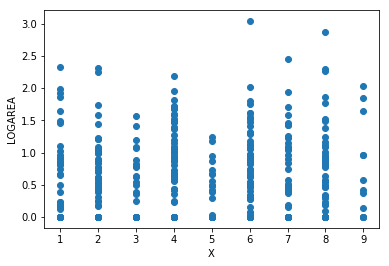

In [1070]:
# plotting values

# data points
plt.scatter(d['X'], d['Logarea'])
plt.xlabel('X')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

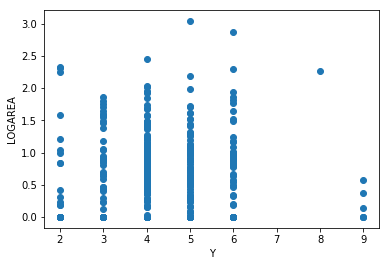

In [1071]:
# plotting values

# data points
plt.scatter(d['Y'], d['Logarea'])
plt.xlabel('Y')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

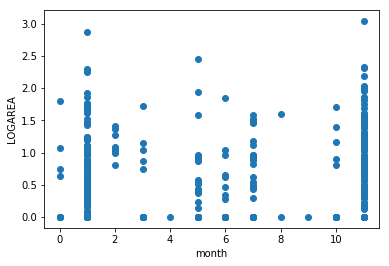

In [1072]:
# plotting values

# data points
plt.scatter(d['month'], d['Logarea'])
plt.xlabel('month')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

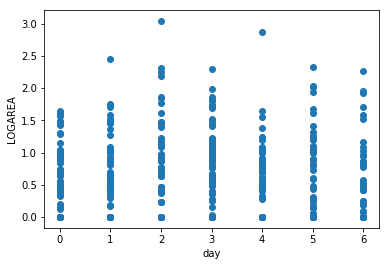

In [1073]:
# plotting values

# data points
plt.scatter(d['day'], d['Logarea'])
plt.xlabel('day')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

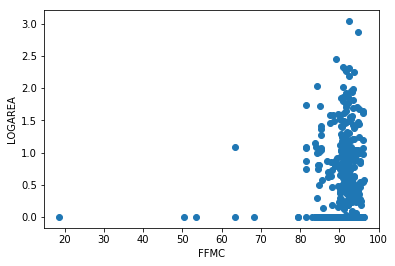

In [1074]:
# plotting values

# data points
plt.scatter(d['FFMC'], d['Logarea'])
plt.xlabel('FFMC')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

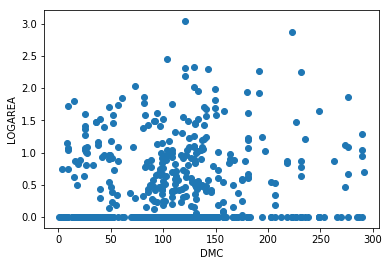

In [1075]:
# plotting values

# data points
plt.scatter(d['DMC'], d['Logarea'])
plt.xlabel('DMC')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

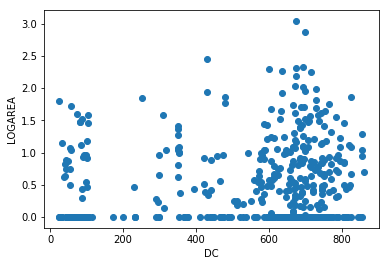

In [1076]:
# plotting values

# data points
plt.scatter(d['DC'], d['Logarea'])
plt.xlabel('DC')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

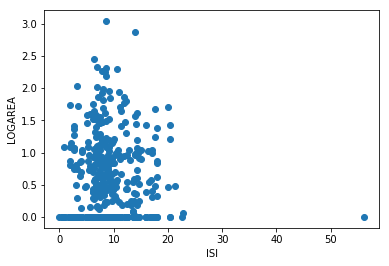

In [1077]:
# plotting values

# data points
plt.scatter(d['ISI'], d['Logarea'])
plt.xlabel('ISI')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

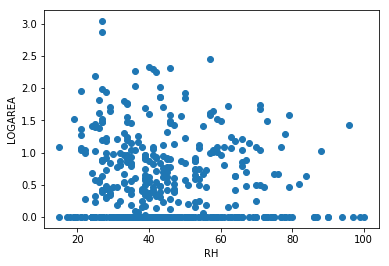

In [1078]:
# plotting values

# data points
plt.scatter(d['RH'], d['Logarea'])
plt.xlabel('RH')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

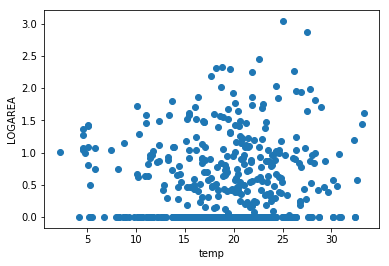

In [1079]:
# plotting values

# data points
plt.scatter(d['temp'], d['Logarea'])
plt.xlabel('temp')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

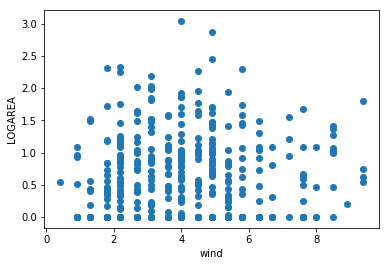

In [1080]:
# plotting values

# data points
plt.scatter(d['wind'], d['Logarea'])
plt.xlabel('wind')
plt.ylabel('LOGAREA')

Text(0, 0.5, 'LOGAREA')

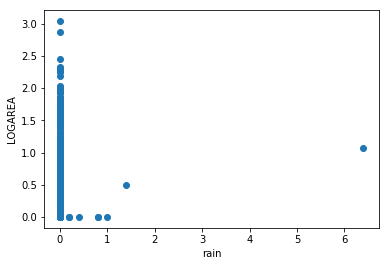

In [1081]:
# plotting values

# data points
plt.scatter(d['rain'], d['Logarea'])
plt.xlabel('rain')
plt.ylabel('LOGAREA')

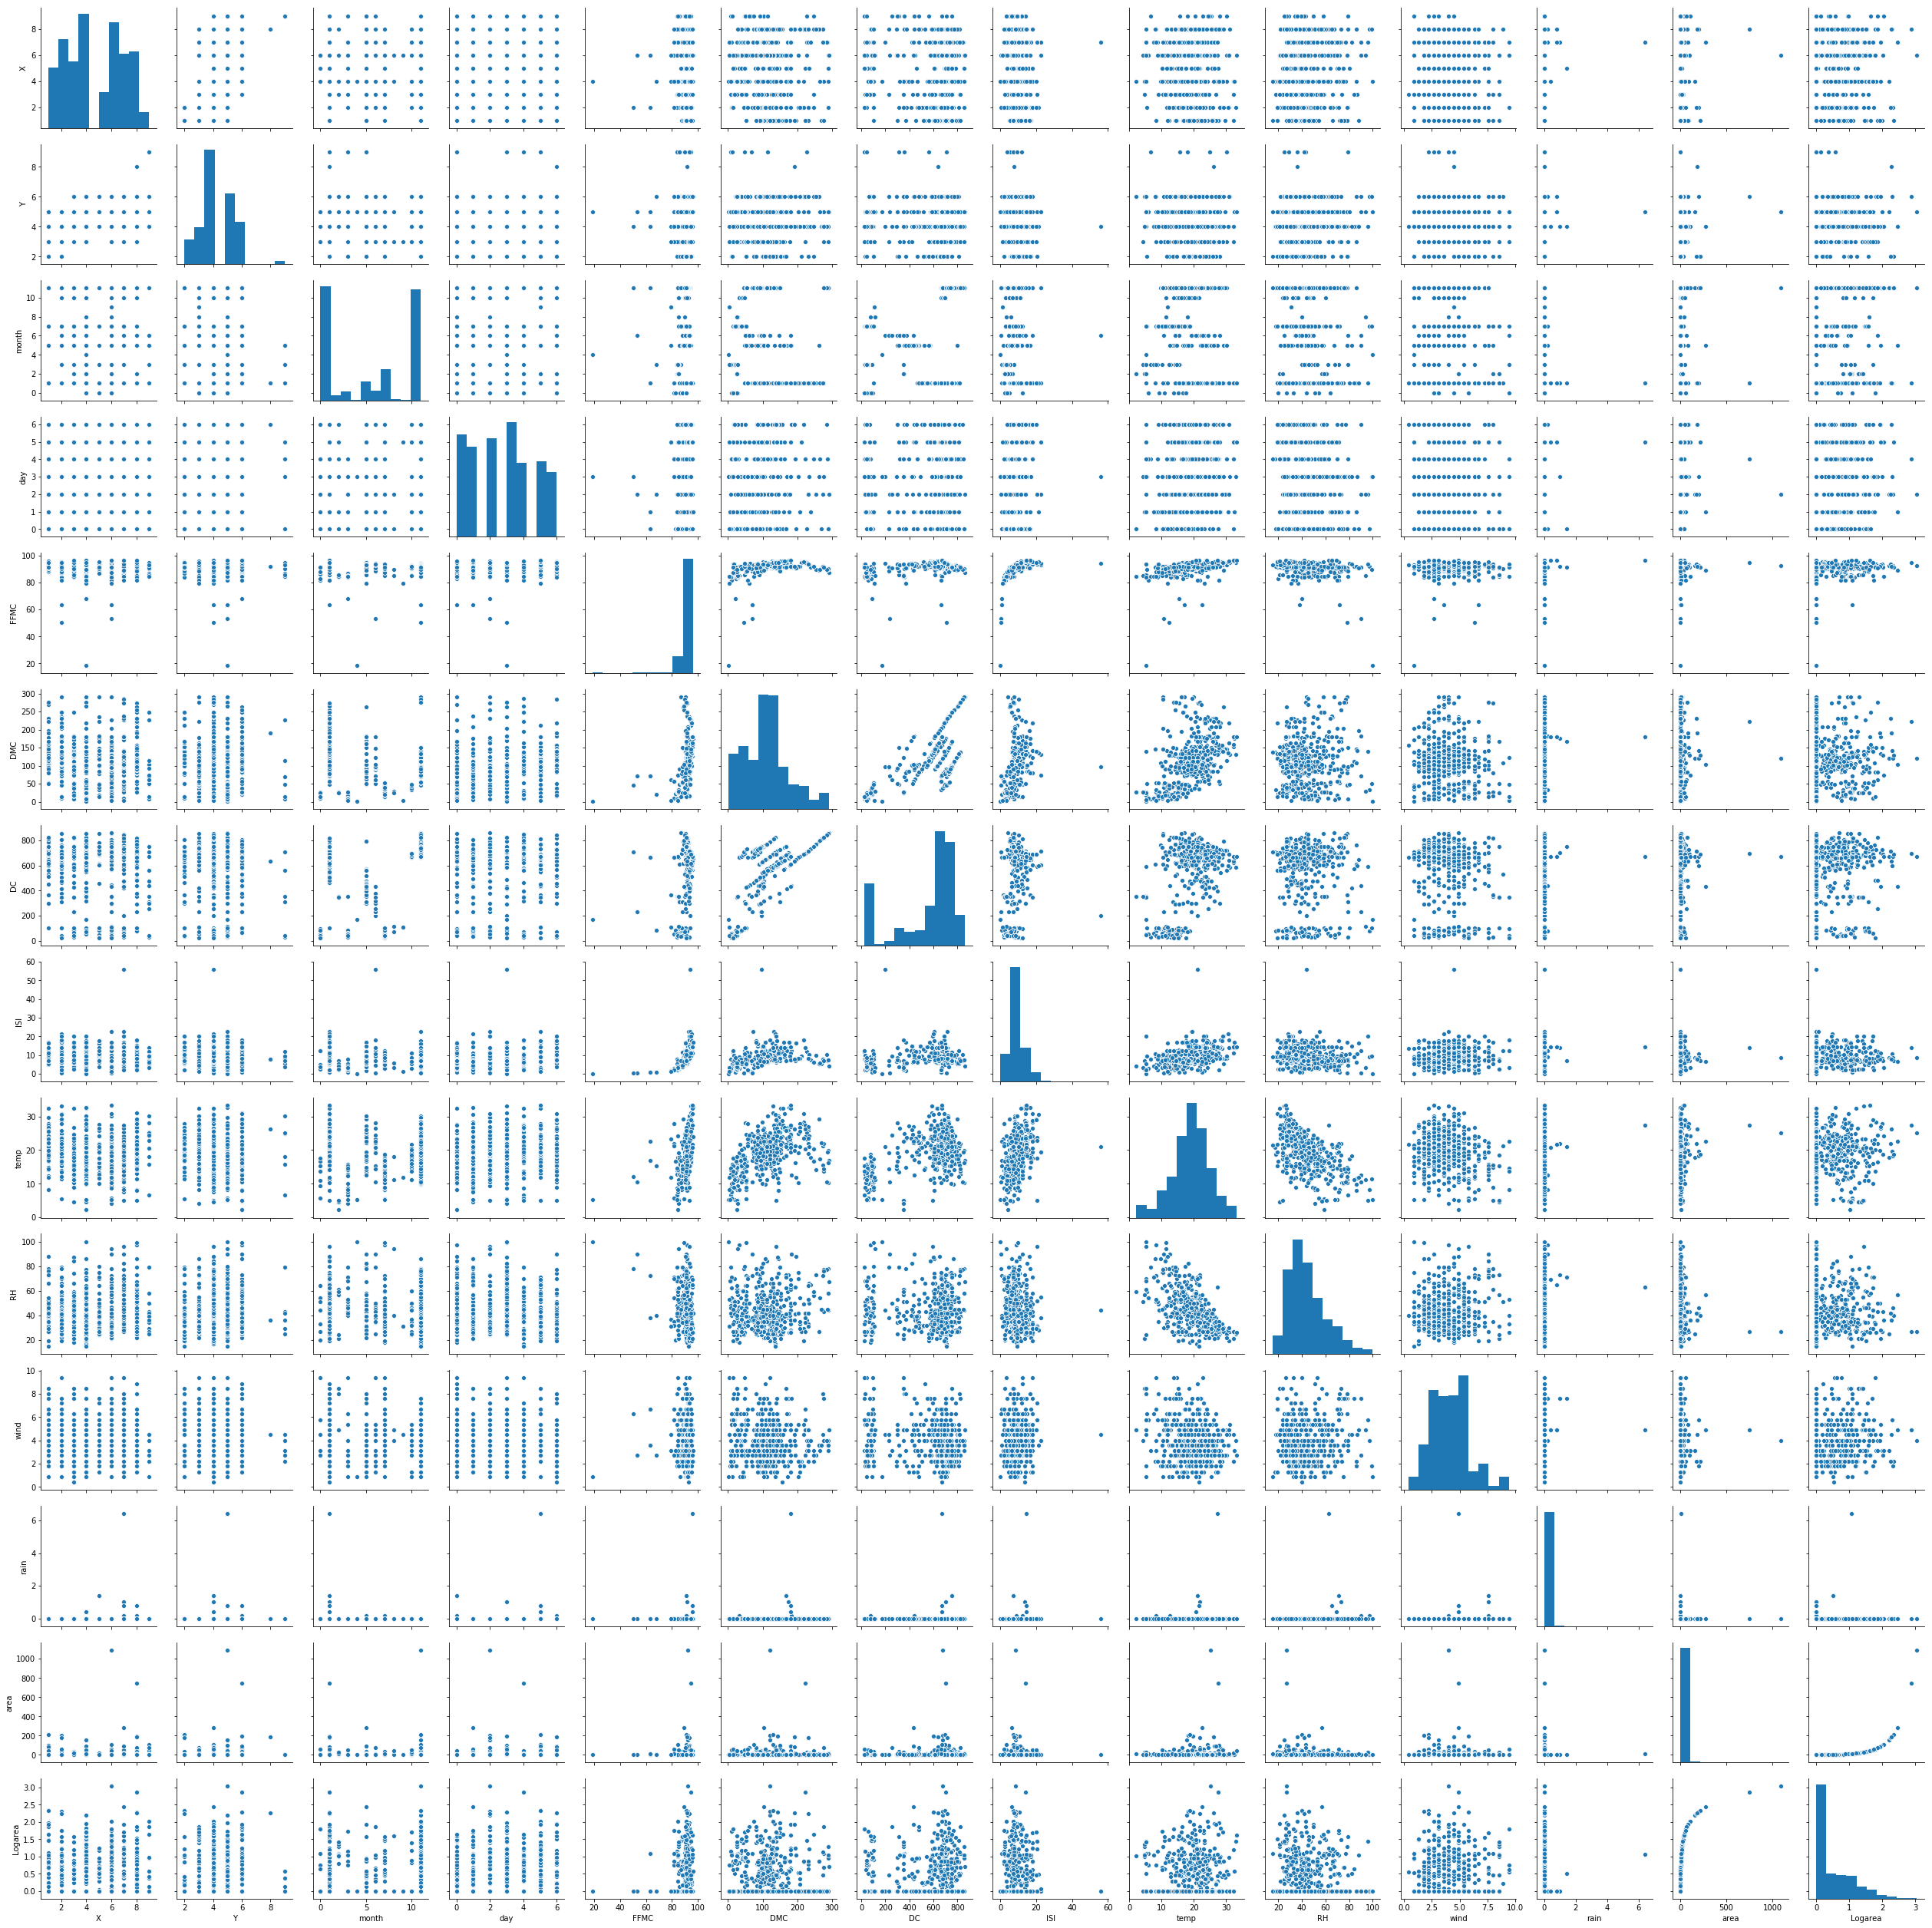

In [1082]:
import seaborn as sns
sns.pairplot(d)

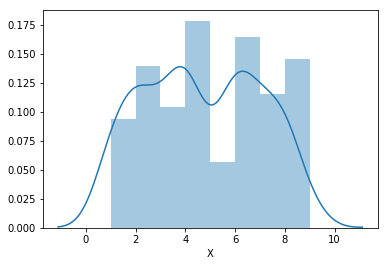

In [1083]:
sns.distplot(d['X'])

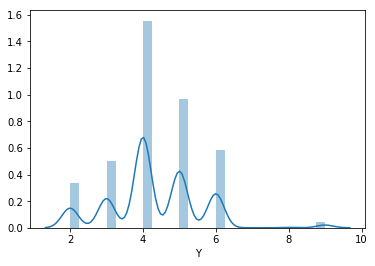

In [1084]:
sns.distplot(d['Y'])

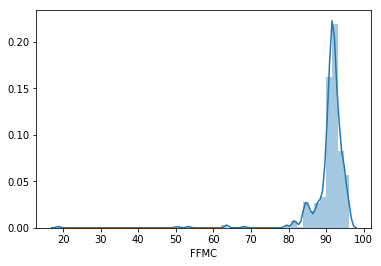

In [1085]:
sns.distplot(d['FFMC'])

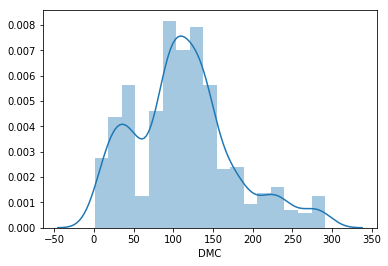

In [1086]:
sns.distplot(d['DMC'])

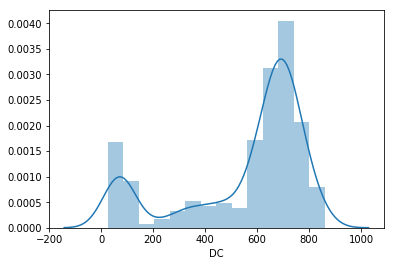

In [1087]:
sns.distplot(d['DC'])

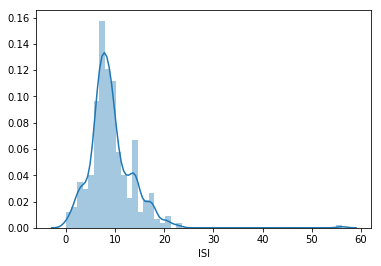

In [1088]:
sns.distplot(d['ISI'])

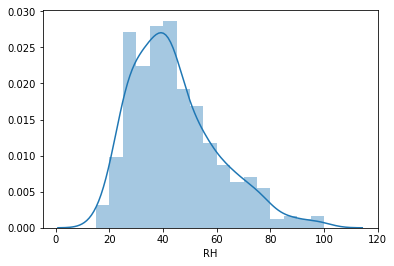

In [1089]:
sns.distplot(d['RH'])

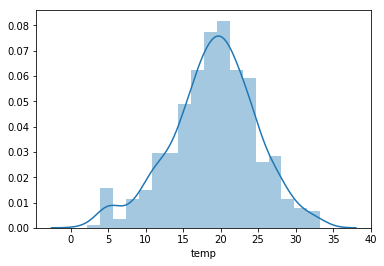

In [1090]:
sns.distplot(d['temp'])

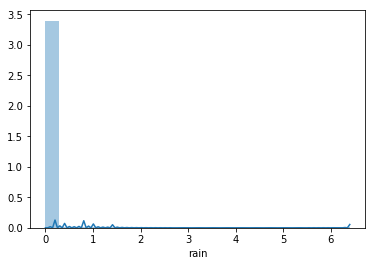

In [1091]:
sns.distplot(d['rain'])

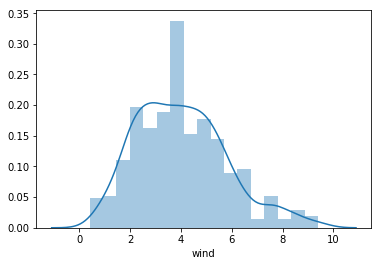

In [1092]:
sns.distplot(d['wind'])

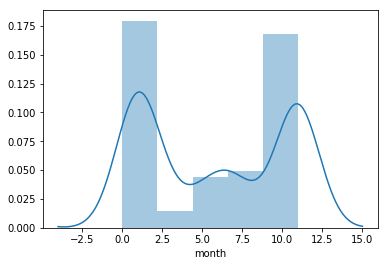

In [1093]:
sns.distplot(d['month'])

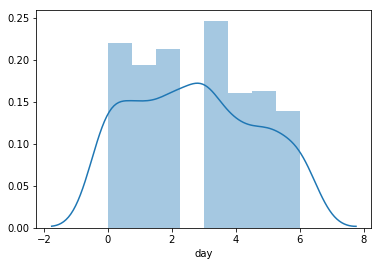

In [1094]:
sns.distplot(d['day'])

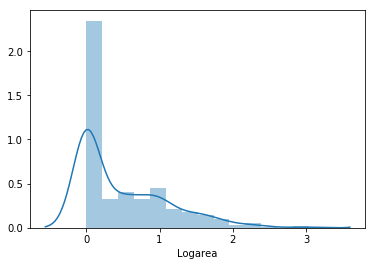

In [1095]:
sns.distplot(d['Logarea'])

In [1096]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
487    1.240549
488    1.678518
489    0.000000
490    0.000000
491    0.000000
492    0.000000
493    1.646600
494    0.981819
495    0.000000
496    0.576341
497    1.195346
498    1.618466
499    1.072617
500    0.000000
501    0.000000
502    0.000000
503    0.469822
504    1.704065
505    0.832509
506    0.000000
507    0.000000
508    0.000000
509    0.501059
510    0.155336
511    0.000000
512    0.871573
513    1.742647
514    1.084934
515    0.000000
516    0.000000
Name: Logarea, Length: 5

In [1097]:
X.shape

(509, 10)

In [1098]:
y.shape

(509,)

In [1099]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Logarea   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     33.52
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           9.26e-50
Time:                        23:30:43   Log-Likelihood:                -462.72
No. Observations:                 509   AIC:                             945.4
Df Residuals:                     499   BIC:                             987.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DMC            0.0005      0.001      0.835      0.404      -0.001       0.002
DC             0.0002      0.000      0.974      0.330      -0.000       0.000
wind           0.0327      0.016      2.059      0.040       0.001       0.064
FFMC           0.0029      0.002      1.198      0.231      -0.002       0.008
X              0.0169      0.014      1.223      0.222      -0.010       0.044
Y              0.0096      0.026      0.371      0.710      -0.041       0.060
rain           0.0330      0.092      0.360      0.719      -0.147       0.213
temp           0.0019      0.007      0.259      0.795      -0.012       0.016
RH            -0.0026      0.002     -1.287      0.199      -0.007       0.001
ISI           -0.0105      0.007     -1.553      0.121      -0.024       0.003
==============================================================================
Omnibus:                       86.395   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.680
Skew:                           1.164   Prob(JB):                     1.88e-28
Kurtosis:                       3.776   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

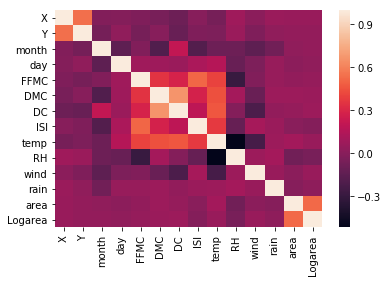

In [1100]:
#plot the correlation using heatmap
import seaborn as sns
corr=d.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [1101]:
mean_area=data['Logarea'].mean()
mean_area

0.4825123591204282

# test size of 4%

In [1102]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [1103]:
X_train

,DMC,DC,wind,FFMC,X,Y,rain,temp,RH,ISI
352,99.0,745.3,3.6,92.1,7,4,0.0,20.6,43,9.6
472,96.2,229.0,4.0,88.2,8,3,0.0,14.3,79,4.7
88,149.3,728.6,3.6,93.5,1,2,0.0,25.3,36,8.1
328,102.3,751.5,1.8,92.2,6,5,0.0,19.7,35,8.4
133,80.9,685.2,3.1,93.7,4,6,0.0,17.6,42,17.9
126,52.2,103.8,2.2,87.6,3,5,0.0,9.0,49,5.0
176,9.1,55.2,5.8,81.5,6,5,0.0,5.8,54,2.7
508,166.9,752.6,3.6,91.0,1,2,0.0,25.9,41,7.1
193,133.3,699.6,4.0,92.9,4,5,0.0,24.3,25,9.2
14,133.3,699.6,4.5,92.9,6,5,0.0,26.4,21,9.2


In [1104]:
X_train.shape

(305, 10)

In [1105]:
y_train.shape

(305,)

In [1106]:
y_train

352    0.481443
472    0.468347
88     0.000000
328    0.000000
133    0.000000
126    0.000000
176    0.748963
508    0.000000
193    1.017451
14     0.000000
408    0.944483
253    0.401401
125    0.000000
140    0.167317
113    0.000000
51     0.000000
363    0.594393
114    0.000000
9      0.000000
19     0.000000
16     0.000000
280    1.011570
0      0.000000
428    0.000000
107    0.000000
347    0.000000
411    0.749736
499    1.072617
383    1.642168
232    2.018659
         ...   
68     0.000000
50     0.000000
403    0.000000
418    0.536558
158    0.421604
255    0.000000
400    0.961895
476    0.440909
407    0.000000
362    0.181844
257    0.225309
279    1.032216
180    0.801404
286    0.000000
395    1.722469
240    0.000000
71     0.000000
468    0.881385
131    0.000000
146    0.290035
453    0.000000
340    0.692847
135    0.000000
205    1.192289
398    0.000000
258    0.000000
72     0.000000
401    0.774517
237    2.330170
37     0.000000
Name: Logarea, Length: 3

In [1107]:
X_train

,DMC,DC,wind,FFMC,X,Y,rain,temp,RH,ISI
352,99.0,745.3,3.6,92.1,7,4,0.0,20.6,43,9.6
472,96.2,229.0,4.0,88.2,8,3,0.0,14.3,79,4.7
88,149.3,728.6,3.6,93.5,1,2,0.0,25.3,36,8.1
328,102.3,751.5,1.8,92.2,6,5,0.0,19.7,35,8.4
133,80.9,685.2,3.1,93.7,4,6,0.0,17.6,42,17.9
126,52.2,103.8,2.2,87.6,3,5,0.0,9.0,49,5.0
176,9.1,55.2,5.8,81.5,6,5,0.0,5.8,54,2.7
508,166.9,752.6,3.6,91.0,1,2,0.0,25.9,41,7.1
193,133.3,699.6,4.0,92.9,4,5,0.0,24.3,25,9.2
14,133.3,699.6,4.5,92.9,6,5,0.0,26.4,21,9.2


In [1108]:
X_train.values.reshape(-1,1)

array([[ 99. ],
       [745.3],
       [  3.6],
       ...,
       [ 11.3],
       [ 60. ],
       [  8.7]])

In [1109]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [1110]:
predictions = model.predict(X_test)

In [1111]:
#Check model accuracy
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.01997919540286497


In [1112]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(X_train)

y_test_prediction = model.predict(X_test)

In [1113]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [ 1.10252375e-03 -2.34472225e-05  2.99379079e-02  4.05506169e-05
  1.77680434e-02 -7.31622855e-03  5.34460093e-02 -5.54674592e-04
 -2.31257632e-03 -9.44438892e-03]
Intercept: 0.40139020458017066


The model performance for training set
--------------------------------------
RMSE is 0.6141752511443405
R2 score is 0.01997919540286497


The model performance for testing set
--------------------------------------
Root mean squared error:  0.5840573965847693
R2 score:  0.02039265825422476


# test size of 3%

In [1120]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [1121]:
X_train

,DMC,DC,wind,FFMC,X,Y,rain,temp,RH,ISI
61,51.3,102.2,6.3,89.3,2,2,0.0,5.5,59,9.6
312,46.2,706.6,6.3,50.4,2,4,0.0,12.2,78,0.4
39,25.7,67.6,2.7,88.1,4,4,0.0,14.1,43,3.8
371,133.6,520.5,4.0,91.9,3,4,0.0,14.2,58,8.0
275,26.4,352.0,4.9,84.6,4,6,0.0,5.1,61,2.0
210,43.7,686.9,3.1,90.6,4,4,0.0,18.4,25,6.7
238,121.1,674.4,4.0,92.5,6,5,0.0,25.1,27,8.6
99,142.4,601.4,5.4,91.4,3,4,0.0,19.8,39,10.6
370,276.3,825.1,7.6,91.0,7,4,0.0,13.8,77,7.1
252,157.3,666.7,3.6,93.1,6,5,0.0,22.1,37,13.5


In [1122]:
y_train

61     0.000000
312    0.000000
39     0.000000
371    0.000000
275    0.804821
210    1.401917
238    3.038159
99     0.000000
370    1.081347
252    0.082785
496    0.576341
387    0.000000
300    0.000000
413    0.000000
384    1.119915
129    0.000000
82     0.000000
474    1.044540
209    1.387568
27     0.000000
89     0.000000
399    0.000000
73     0.000000
189    0.965672
173    0.609594
163    0.469822
69     0.000000
223    1.580012
91     0.000000
417    0.000000
         ...   
68     0.000000
50     0.000000
403    0.000000
418    0.536558
158    0.421604
255    0.000000
400    0.961895
476    0.440909
407    0.000000
362    0.181844
257    0.225309
279    1.032216
180    0.801404
286    0.000000
395    1.722469
240    0.000000
71     0.000000
468    0.881385
131    0.000000
146    0.290035
453    0.000000
340    0.692847
135    0.000000
205    1.192289
398    0.000000
258    0.000000
72     0.000000
401    0.774517
237    2.330170
37     0.000000
Name: Logarea, Length: 3

In [1123]:
X_train.values.reshape(-1,1)

array([[ 51.3],
       [102.2],
       [  6.3],
       ...,
       [ 11.3],
       [ 60. ],
       [  8.7]])

In [1124]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [1127]:
predictions = model.predict(X_test)

In [1125]:
#Check model accuracy
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.021095540565464144


In [1128]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(X_train)

y_test_prediction = model.predict(X_test)

In [1129]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [ 9.92310293e-04  5.86797320e-05  2.63284805e-02  1.51717192e-03
  1.71174032e-02 -1.53982050e-02  5.84297988e-02 -1.90506583e-03
 -2.32226917e-03 -1.17155838e-02]
Intercept: 0.33254506147073726


The model performance for training set
--------------------------------------
RMSE is 0.6171882074872707
R2 score is 0.021095540565464144


The model performance for testing set
--------------------------------------
Root mean squared error:  0.5660343026660577
R2 score:  0.017209837551721896


# test size of 2%

In [1138]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [1139]:
X_train.values.reshape(-1,1)

array([[108.3],
       [647.1],
       [  5.4],
       ...,
       [ 11.3],
       [ 60. ],
       [  8.7]])

In [1140]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [1141]:
predictions = model.predict(X_test)

In [1142]:
#Check model accuracy
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.021204093288832992


In [1143]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
y_train_prediction = model.predict(X_train)

y_test_prediction = model.predict(X_test)

In [1144]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [ 8.25523572e-04  7.07757366e-05  2.85249755e-02  2.77052766e-03
  1.50616433e-02 -6.88318329e-03  4.96755265e-02 -2.38125238e-05
 -1.48659599e-03 -1.23466615e-02]
Intercept: 0.11277688741972758


The model performance for training set
--------------------------------------
RMSE is 0.5982833180349679
R2 score is 0.021204093288832992


The model performance for testing set
--------------------------------------
Root mean squared error:  0.6159711215352729
R2 score:  0.019549067948170573


# RANDOM FOREST REGRESSOR

In [1145]:
from sklearn.ensemble import RandomForestRegressor

In [1146]:
ran=RandomForestRegressor()

In [1147]:
ran.fit(X,y)

C:\Users\kalyanbablu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1148]:
yha=ran.predict(X)

In [1149]:
yha.shape

(509,)

In [1150]:
r2_score(y,yha)

0.7925503962880944